Importing Libraries

In [275]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


Importing Dataset

In [346]:
df=pd.read_excel('/Users/patil/OneDrive/Desktop/Model 3 Mon data/Train Data Model.xlsx', sheet_name='Train',index_col=0)

Null Values 0


In [349]:
print('Null Values',df.isna().sum().sum())
print("Dimesions of data",df.shape)

Null Values 0
Dimesions of data (5634, 7)


In [350]:
df.head(2)

,HotMetal,BathWt,O,Temp,BlowDur,O2SideLance-B,C_%
Heat,,,,,,,
23200675,127,234.2,762,1607,33.25,504.1,0.035
23300755,140,242.0,771,1610,27.05,387.2,0.035


In [282]:
df.describe()

,HotMetal,BathWt,O,Temp,BlowDur,O2SideLance-B,C_%
count,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000
mean,148.189031,226.111981,817.943557,1621.602414,33.862824,674.353017,0.036146
std,15.383919,11.313476,228.810350,24.112433,7.316739,371.727138,0.013028
min,100.000000,102.400000,34.000000,1525.000000,0.000000,0.000000,0.002000
25%,137.000000,220.800000,686.000000,1607.000000,28.880000,434.000000,0.028000
50%,142.000000,226.700000,825.000000,1622.000000,32.030000,532.700000,0.033000
75%,165.000000,231.700000,963.000000,1638.000000,38.050000,779.200000,0.039000
max,183.000000,267.200000,2010.000000,1766.000000,98.280000,3454.700000,0.099000


In [283]:
#Getting Correlation of each feature with Carbon
#Sortinng w.r.t Correlation

In [359]:
corr=df.corr()['C_%']           
corr_sorted=corr[np.argsort(corr,axis=0)[::-1]]
corr_df = corr_sorted.to_frame().rename(columns={'C_%': 'Correlation'})
corr_df
corr_df.style.set_caption('Correlation with C_%').format({'Correlation': '{:.2f}'}).background_gradient(cmap='coolwarm')


,Correlation
C_%,1.00
HotMetal,-0.02
BlowDur,-0.05
BathWt,-0.05
O2SideLance-B,-0.06
Temp,-0.30
O,-0.88


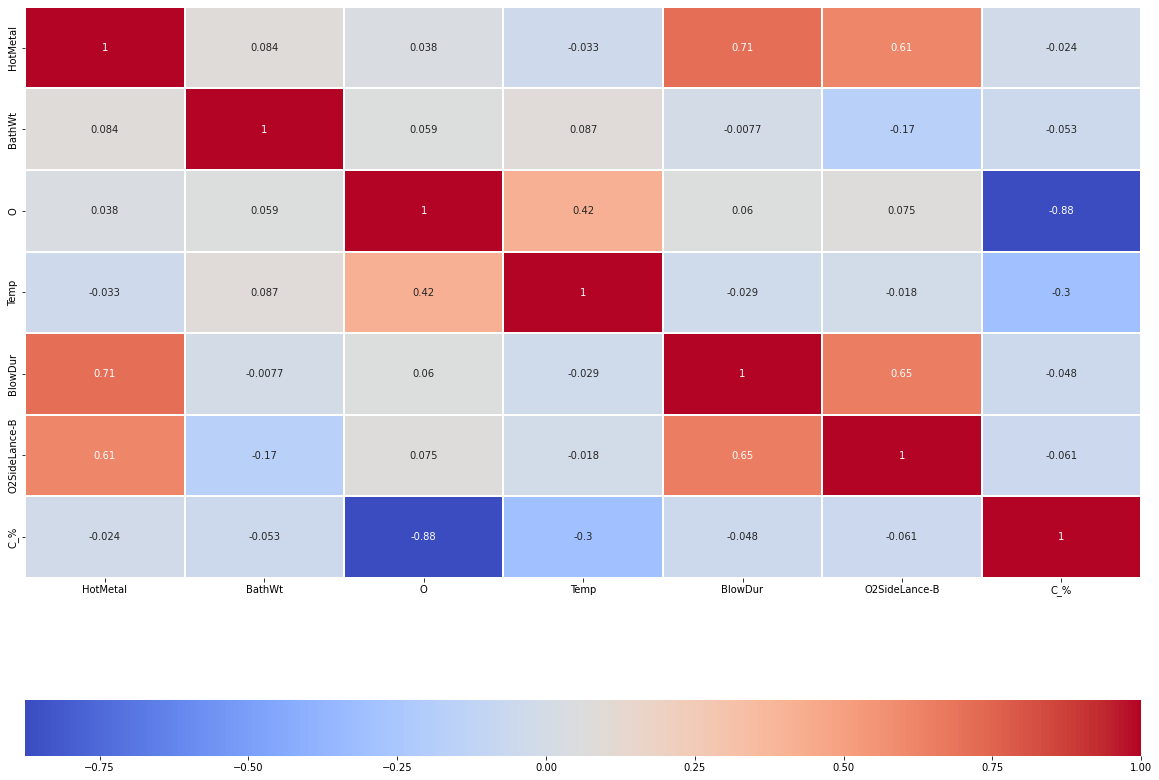

In [360]:
fig, ax = plt.subplots(figsize=(20,15)) 
sns.heatmap(df.corr(),cmap='coolwarm', annot=True, linewidths=.10,ax=ax,fmt='.2g',cbar_kws= {'orientation': 'horizontal'})
plt.show()

Normalize DataSet

In [361]:
from sklearn.preprocessing import MinMaxScaler   #importing MinMaxScalar from Sklearn.preprocessing
scaler = MinMaxScaler()                          #assiging minmaxscaler
df1=scaler.fit_transform(df)                     #fit df in minmaxscaler
names=df.columns                                 #column names
N_df=pd.DataFrame(df1,columns=names)             #created normalize dataframe with N_df

In [362]:
O_X=df.drop('C_%',axis=1)                     #dropping C_% columns and assigning all remaining to O_X
O_Y=df['C_%']                                 #Original Data values

Assigning Coluumns to N_X and N_Y

In [363]:
N_X=N_df.drop('C_%',axis=1)                     #dropping C_% columns and assigning all remaining to N_X- Normalize Data set
N_Y=N_df['C_%']

Dimensionality Reduction

In [364]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [365]:
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(N_X)
#pca = PCA()
#X_pca = pca.fit_transform(X_scaled)
#print(pca.explained_variance_ratio_)

Train test and Split

In [366]:
from sklearn.model_selection import train_test_split      #importing train_test_split 
X_Train, X_Test, Y_Train, Y_Test = train_test_split(N_X,N_Y,test_size=0.3,random_state=None)   #splitting data into 8-0-20 percenatge

In [367]:
import xgboost as xg                              #importing xgboost

In [368]:
xgb_r = xg.XGBRegressor(objective ='reg:squarederror', booster='gbtree', n_estimators = 10, seed = 123) 

In [369]:
xgb_r.fit(X_Train,Y_Train)                       #fitting data into model

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

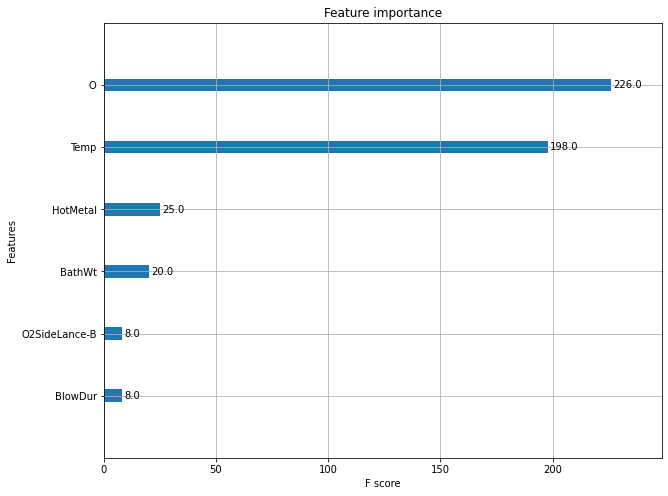

In [370]:
fig, ax = plt.subplots(figsize=(10,8))
xg.plot_importance(xgb_r, ax=ax)
plt.show()

,Actual_C,Predicted_C
3894,0.278351,0.284614
5599,0.381443,0.379983
1664,0.329897,0.341417
647,0.391753,0.389575
1367,0.618557,0.605765
...,...,...
1867,0.340206,0.349757
1980,0.278351,0.285039
4574,0.278351,0.280206
4723,0.268041,0.277249


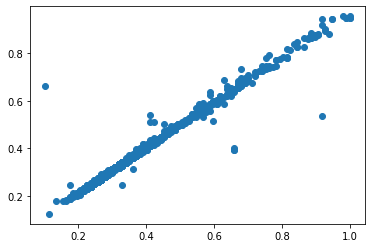

In [371]:
Y_Pred= xgb_r.predict(X_Test)
df2 = pd.DataFrame({'Actual_C': Y_Test, 'Predicted_C': Y_Pred})
plt.scatter(Y_Test,Y_Pred)
df2

In [377]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('r2_score:', r2_score(Y_Test, Y_Pred))
mse=metrics.mean_absolute_error(Y_Test, Y_Pred)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_Test, Y_Pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_Test, Y_Pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_Test, Y_Pred)))

r2_score: 0.9727777440777093
Mean Absolute Error: 0.008544911647854331
Mean Squared Error: 0.0005180973690228243
Root Mean Squared Error: 0.02276175232759605


In [373]:
original_C_pred=(Y_Pred*(max(O_Y)-min(O_Y))+min(O_Y))
Original_C_Test=(Y_Test*(max(O_Y)-min(O_Y))+min(O_Y))
df2 = pd.DataFrame({'Actual_C': (Y_Test*(max(O_Y)-min(O_Y))+min(O_Y)), 'Predicted_C': (Y_Pred*(max(O_Y)-min(O_Y))+min(O_Y))})
df2

,Actual_C,Predicted_C
3894,0.029,0.029608
5599,0.039,0.038858
1664,0.034,0.035117
647,0.040,0.039789
1367,0.062,0.060759
...,...,...
1867,0.035,0.035926
1980,0.029,0.029649
4574,0.029,0.029180
4723,0.028,0.028893


In [374]:
print('r2_score:', r2_score(Original_C_Test, original_C_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(Original_C_Test, original_C_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Original_C_Test, original_C_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Original_C_Test, original_C_pred)))

r2_score: 0.9727777388147341
Mean Absolute Error: 0.0008288570789632396
Mean Squared Error: 4.874779087593905e-06
Root Mean Squared Error: 0.002207890189206407


In [385]:
import pickle

In [386]:
# Save model as pickle file
with open('model.pkl', 'wb') as f:
    pickle.dump(xgb_r, f)